<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/EX_W4_Fuzzy_RiceCook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


63.333333333333336


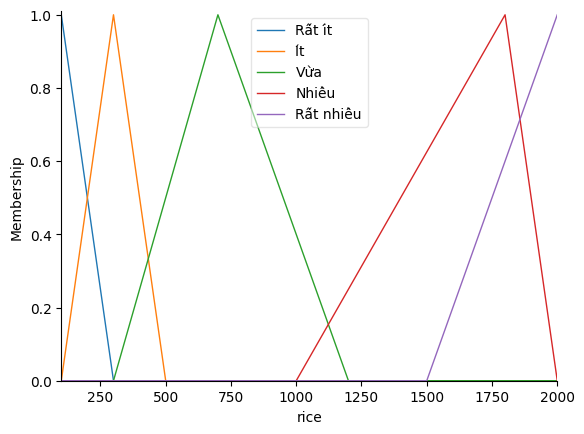

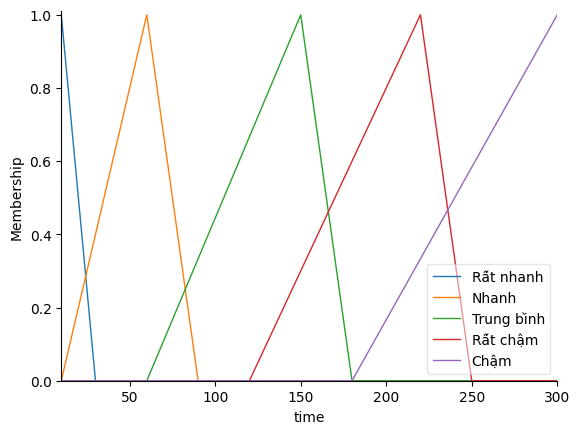

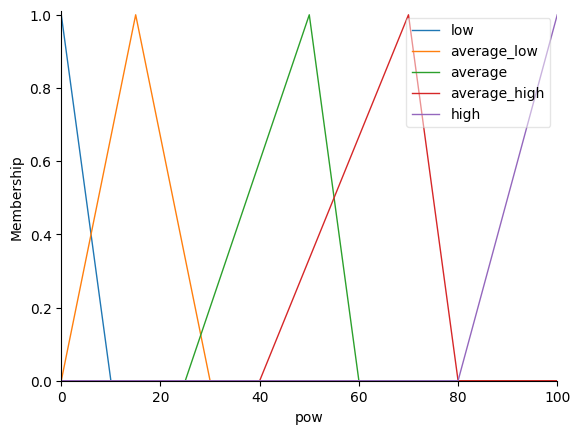

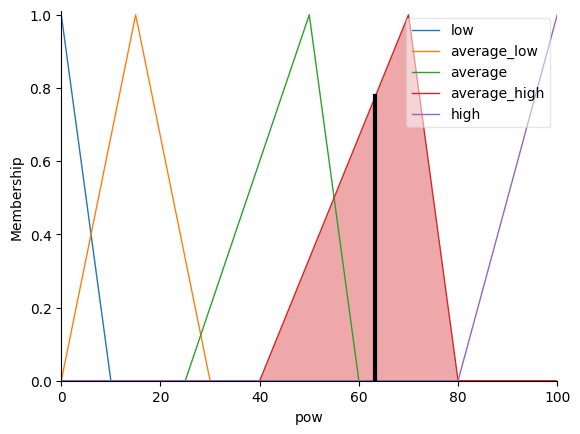

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

rice =ctrl.Antecedent(np.arange(100,2010,10),'rice')
time =ctrl.Antecedent(np.arange(10,301,1),'time')
pow = ctrl.Consequent(np.arange(0,101,1),'pow')

rice['Rất ít'] = fuzz.trimf(rice.universe,[100,100,300])
rice['Ít'] = fuzz.trimf(rice.universe,[100,300,500])
rice['Vừa'] = fuzz.trimf(rice.universe,[300,700,1200])
rice['Nhiều'] = fuzz.trimf(rice.universe,[1000,1800,2000])
rice['Rất nhiều'] = fuzz.trimf(rice.universe,[1500,2000,2000])

time['Rất nhanh'] = fuzz.trimf(time.universe,[10,10,30])
time['Nhanh'] = fuzz.trimf(time.universe,[10,60,90])
time['Trung bình'] = fuzz.trimf(time.universe,[60,150,180])
time['Rất chậm'] = fuzz.trimf(time.universe,[120,220,250])
time['Chậm'] = fuzz.trimf(time.universe,[180,300,300])

pow['low'] = fuzz.trimf(pow.universe,[0,0,10])
pow['average_low'] = fuzz.trimf(pow.universe,[0,15,30])
pow['average'] = fuzz.trimf(pow.universe,[25,50,60])
pow['average_high'] = fuzz.trimf(pow.universe,[40,70,80])
pow['high'] = fuzz.trimf(pow.universe,[80,100,100])

rule1 = ctrl.Rule(rice['Rất ít']&time['Rất nhanh'],pow['average'])
rule2 = ctrl.Rule(rice['Rất ít']&time['Nhanh'],pow['average'])
rule3 = ctrl.Rule(rice['Rất ít']&time['Trung bình'],pow['average_low'])
rule4 = ctrl.Rule(rice['Rất ít']&time['Rất chậm'],pow['low'])
rule5 = ctrl.Rule(rice['Rất ít']&time['Chậm'],pow['low'])
rule6 = ctrl.Rule(rice['Ít']&time['Rất nhanh'],pow['average_high'])
rule7 = ctrl.Rule(rice['Ít']&time['Nhanh'],pow['average'])
rule8 = ctrl.Rule(rice['Ít']&time['Trung bình'],pow['average'])
rule9 = ctrl.Rule(rice['Ít']&time['Rất chậm'],pow['average_low'])
rule10 = ctrl.Rule(rice['Ít']&time['Chậm'],pow['low'])
rule11 = ctrl.Rule(rice['Vừa']&time['Rất nhanh'],pow['average_high'])
rule12 = ctrl.Rule(rice['Vừa']&time['Nhanh'],pow['average_high'])
rule13 = ctrl.Rule(rice['Vừa']&time['Trung bình'],pow['average_high'])
rule14 = ctrl.Rule(rice['Vừa']&time['Rất chậm'],pow['average'])
rule15 = ctrl.Rule(rice['Vừa']&time['Chậm'],pow['average_low'])
rule16 = ctrl.Rule(rice['Nhiều']&time['Rất nhanh'],pow['high'])
rule17 = ctrl.Rule(rice['Nhiều']&time['Nhanh'],pow['high'])
rule18 = ctrl.Rule(rice['Nhiều']&time['Trung bình'],pow['average_high'])
rule19 = ctrl.Rule(rice['Nhiều']&time['Rất chậm'],pow['average_high'])
rule20 = ctrl.Rule(rice['Nhiều']&time['Chậm'],pow['average'])
rule21 = ctrl.Rule(rice['Rất nhiều']&time['Rất nhanh'],pow['high'])
rule22 = ctrl.Rule(rice['Rất nhiều']&time['Nhanh'],pow['high'])
rule23 = ctrl.Rule(rice['Rất nhiều']&time['Trung bình'],pow['high'])
rule24 = ctrl.Rule(rice['Rất nhiều']&time['Rất chậm'],pow['average_high'])
rule25 = ctrl.Rule(rice['Rất nhiều']&time['Chậm'],pow['average_high'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                   rule23,rule24,rule25])
power = ctrl.ControlSystemSimulation(power_ctrl)
power.input['rice'] = 2000
power.input['time'] = 300
power.compute()

rice.view()
time.view()
pow.view()
print(power.output['pow'])
pow.view(sim = power)